In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
plt.style.use('fivethirtyeight')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
df = pd.read_csv('/TSLA.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,646.359985,648.799988,637.299988,643.380005,643.380005,14604900
1,2021-07-26,650.969971,668.200012,647.109985,657.619995,657.619995,25336600
2,2021-07-27,663.400024,666.500000,627.239990,644.780029,644.780029,32813300
3,2021-07-28,647.000000,654.969971,639.400024,646.979980,646.979980,16006600
4,2021-07-29,649.789978,683.690002,648.799988,677.349976,677.349976,30394600


In [5]:
df = df.loc[:,['Date','Close']]
df.head()

,Date,Close
0,2021-07-23,643.380005
1,2021-07-26,657.619995
2,2021-07-27,644.780029
3,2021-07-28,646.979980
4,2021-07-29,677.349976


In [10]:
#plot the data
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')

test.index = pd.to_datetime(test.index)
test.head()

,Close
Date,
2022-01-03,1199.780029
2022-01-04,1149.589966
2022-01-05,1088.119995
2022-01-06,1064.699951
2022-01-07,1026.959961


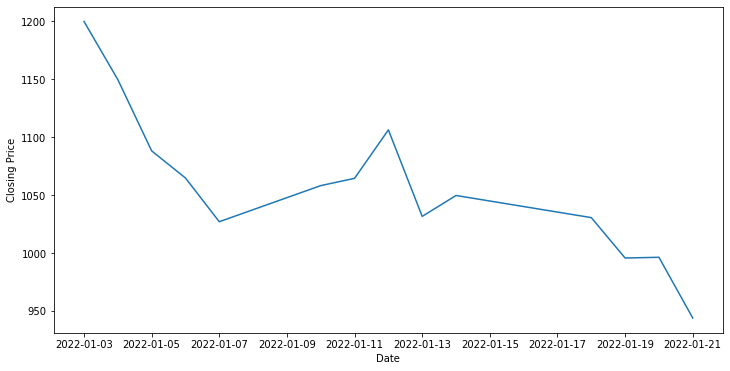

In [12]:
#plotting
plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

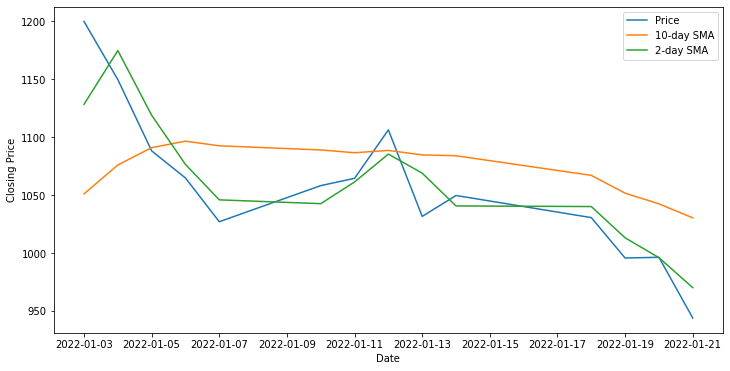

In [20]:
#Simple Moving Average - Rolling Mean - We can do rolling mean of the number of days - k value
sma10 = df['Close'].rolling(10).mean()
sma2 = df['Close'].rolling(2).mean()
#The above code is for finding 10-days SMA.  This is done on the dataset

df['10-day SMA'] = np.round(sma10,decimals=3)
df['2-day SMA'] = np.round(sma2,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)



plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.plot(test['10-day SMA'],label='10-day SMA')
plt.plot(test['2-day SMA'],label='2-day SMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [21]:
df.head(15)

,Date,Close,10-day SMA,2-day SMA
0,2021-07-23,643.380005,NaN,NaN
1,2021-07-26,657.619995,NaN,650.500
2,2021-07-27,644.780029,NaN,651.200
3,2021-07-28,646.979980,NaN,645.880
4,2021-07-29,677.349976,NaN,662.165
5,2021-07-30,687.200012,NaN,682.275
6,2021-08-02,709.669983,NaN,698.435
7,2021-08-03,709.739990,NaN,709.705
8,2021-08-04,710.919983,NaN,710.330
9,2021-08-05,714.630005,680.227,712.775


In [ ]:
from sklearn.metrics import mean_absolute_percentage_error

In [48]:
#Calculating simple moving averages of the value as prediction
predictions = df['2-day SMA'].rolling(2).mean()
df['2-day SMA'].head(15)
for 

0         NaN
1     650.500
2     651.200
3     645.880
4     662.165
5     682.275
6     698.435
7     709.705
8     710.330
9     712.775
10    706.865
11    706.430
12    711.875
13    708.905
14    715.035
Name: 2-day SMA, dtype: float64

In [47]:
prediction.head(15)

0          NaN
1          NaN
2     650.8500
3     648.5400
4     654.0225
5     672.2200
6     690.3550
7     704.0700
8     710.0175
9     711.5525
10    709.8200
11    706.6475
12    709.1525
13    710.3900
14    711.9700
Name: 2-day SMA, dtype: float64

In [30]:
#Weighted moving average - for 10 days
weights = np.arange(1,11)
weights
wma10 = df['Close'].rolling(10).apply(lambda price: np.dot(price,weights)/weights.sum(), raw = True)
wma10

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
          ...     
122    1065.206179
123    1055.497818
124    1042.528915
125    1032.471646
126    1014.562560
Name: Close, Length: 127, dtype: float64

In [28]:
np.dot([3,3],[2,5])

21

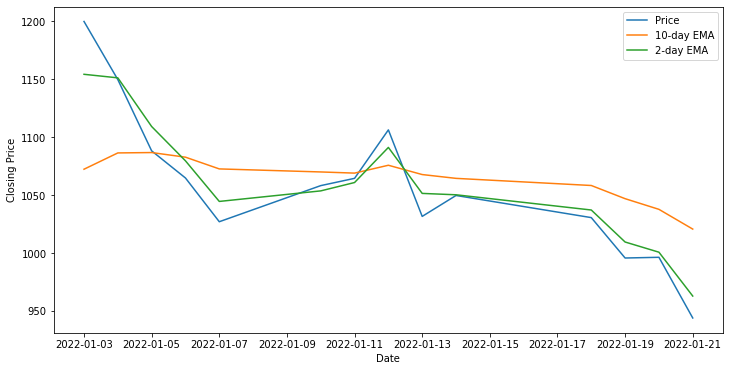

In [34]:
#Exponential moving average
ema10 = df['Close'].ewm(span=10,adjust= False).mean()
ema2 = df['Close'].ewm(span=2,adjust= False).mean()

df['10-day EMA'] = np.round(ema10,decimals=3)
df['2-day EMA'] = np.round(ema2,decimals=3)
train = df.loc[df['Date'] <= '2021-12-31']
test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)



plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.plot(test['10-day EMA'],label='10-day EMA')
plt.plot(test['2-day EMA'],label='2-day EMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [35]:
df.head(10)

,Date,Close,10-day SMA,2-day SMA,10-day EMA,2-day EMA
0,2021-07-23,643.380005,NaN,NaN,643.380,643.380
1,2021-07-26,657.619995,NaN,650.500,645.969,652.873
2,2021-07-27,644.780029,NaN,651.200,645.753,647.478
3,2021-07-28,646.979980,NaN,645.880,645.976,647.146
4,2021-07-29,677.349976,NaN,662.165,651.680,667.282
5,2021-07-30,687.200012,NaN,682.275,658.138,680.561
6,2021-08-02,709.669983,NaN,698.435,667.508,699.967
7,2021-08-03,709.739990,NaN,709.705,675.186,706.482
8,2021-08-04,710.919983,NaN,710.330,681.683,709.441
9,2021-08-05,714.630005,680.227,712.775,687.674,712.900


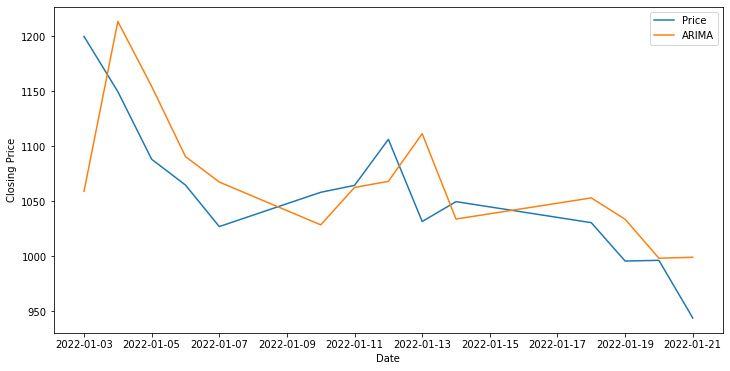

In [36]:
#ARIMA - Proper model which puts the differentiation into prediction
#How will be my model performance for the next 1 day
from statsmodels.tsa.arima_model import ARIMA
X = df['Close'].values
size = np.sum(df['Date'] <= '2021-12-31')
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(1,1,0)) #Order p,q,d
  model_fit = model.fit()
  output = model_fit.forecast()
  #Take the first value
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #history.append(yhat)

test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
test.loc[:,'ARIMA'] = predictions



plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.plot(test['ARIMA'],label='ARIMA')
#plt.plot(test['2-day EMA'],label='2-day EMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


    

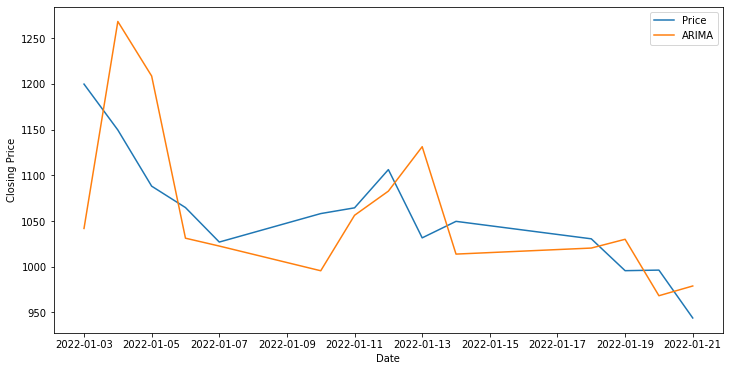

In [37]:
#ARIMA - Proper model which puts the differentiation into prediction
#How will be my model performance for the next 1 day
from statsmodels.tsa.arima_model import ARIMA
X = df['Close'].values
size = np.sum(df['Date'] <= '2021-12-31')
train, test = X[0:size], X[size:len(X)]

history = [x for x in train]
predictions = list()

for t in range(len(test)):
  model = ARIMA(history, order=(1,2,0)) #Order p,d,q
  #P - AR
  # D - max 2
  # Q - MA (Order)
  model_fit = model.fit()
  output = model_fit.forecast()
  #Take the first value
  yhat = output[0]
  predictions.append(yhat)
  obs = test[t]
  history.append(obs)
  #history.append(yhat)

test = df.loc[df['Date'] > '2021-12-31']
test = test.set_index('Date')
test.index = pd.to_datetime(test.index)
test.loc[:,'ARIMA'] = predictions



plt.figure(figsize=(12,6))
plt.plot(test['Close'], label='Price')
plt.plot(test['ARIMA'],label='ARIMA')
#plt.plot(test['2-day EMA'],label='2-day EMA')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()


In [43]:
!pip install 

ModuleNotFoundError: ignored